In [1]:
import pandas as pd

오픈 API 호출을 통해 수집되어진 자료를 CSV로 저장하여 데이터 전처리 및 EDA 분석 수행

In [13]:
localurl='April_sensor_data1.csv'
try:
    #df = pd.read_csv(localurl, skiprows = 1)
    #df = pd.read_csv(localurl)
    dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in dates] 
    #df = pd.read_csv(localurl, parse_dates=['REG_DATE'], date_parser=dateparse)
    df = pd.read_csv(localurl, parse_dates=[1], date_parser=dateparse)
except  OSError as err:
    print("OS error: {0}".format(err))
except ValueError as err:
    print("Value error: {0}".format(err))


In [11]:
#관측값(관찰값)
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
0,1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16
1,2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15
2,3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20
3,4,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17
4,5,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20


In [4]:
df.tail()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
25915,25916,2020-04-19 23:55:00,4.35,4.35,20.6,42.3,1.76,7.70
25916,25917,2020-04-19 23:56:00,4.21,4.22,20.6,42.3,1.78,7.69
25917,25918,2020-04-19 23:57:00,5.07,5.07,20.6,42.3,1.76,7.66
25918,25919,2020-04-19 23:58:00,3.90,3.90,20.6,42.3,1.77,7.71
25919,25920,2020-04-19 23:59:00,4.64,4.64,20.6,42.3,1.74,7.70


In [5]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2'],
      dtype='object')

In [6]:
df['weekday'] = df['REG_DATE'].dt.day_name()
#df['weekday'] = df['REG_DATE'].dt.dayofweek

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
 
df['weekday'] = df['REG_DATE'].dt.dayofweek.map(dayOfWeek)



 df['REG_DATE'].dt.dayofweek.map(dayOfWeek)

import calendar
df['weekday'] = pd.Series(pd.Categorical(df['REG_DATE'].dt.weekday_name, categories=list(calendar.day_name)))

In [7]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2', 'weekday'],
      dtype='object')

In [8]:
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,weekday
0,1,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16,Thursday
1,2,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15,Thursday
2,3,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20,Thursday
3,4,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17,Thursday
4,5,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20,Thursday


In [9]:
df.drop('NO', axis=1, inplace=True)

In [10]:
df.columns

Index(['REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC', 'CO2',
       'weekday'],
      dtype='object')

In [11]:
df = df.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [12]:
df.columns

Index(['REG_DATE', 'PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC', 'CO2',
       'weekday'],
      dtype='object')

In [18]:
X = df.iloc[:,1] # read second column
y = df.iloc[:,7] # read third column
m = len(y) # number of training example
df.head() # view first few rows of the dat

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2,weekday
0,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16,Thursday
1,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15,Thursday
2,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20,Thursday
3,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17,Thursday
4,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20,Thursday


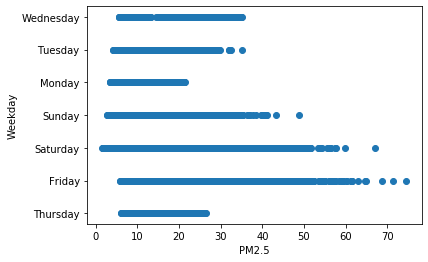

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('PM2.5')
plt.ylabel('Weekday')
plt.show()

In [51]:
X = df.iloc[:,4] # read second column Humidity
#X = (X - np.mean(X))/np.std(X)
y = df.iloc[:,6] # read third column CO2
m = len(y) # number of training example
df.head() # view first few rows of the dat

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2,weekday
0,2020-04-02 00:00:00,7.54,6.19,21.6,22.1,1.86,4.16,Thursday
1,2020-04-02 00:01:00,7.83,6.19,21.6,22.1,1.85,4.15,Thursday
2,2020-04-02 00:02:00,7.54,6.19,21.6,22.1,1.86,4.20,Thursday
3,2020-04-02 00:03:00,7.83,6.19,21.5,22.1,1.81,4.17,Thursday
4,2020-04-02 00:04:00,8.12,6.19,21.6,22.1,1.85,4.20,Thursday


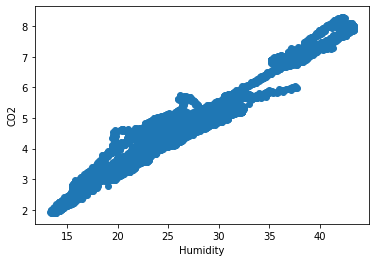

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('Humidity')
plt.ylabel('CO2')
plt.show()

데이터 값 살펴보기

[가정] 요일별로 공기질의 차이가 있음 


[방법] 
- 관찰값 중 금요일과 일요일을 대상으로 공기질의 비교함
- 공기질의 비교를 위해 CO2, TVOC, PM2.5의 센서값을 선택함          

In [ ]:
# 금요일의 CO2
df['CO2'][df['weekday']=='Friday'].head()

In [ ]:
# 금요일 관측값
df[df['weekday']=='Friday'].head()

df_friday = df[df['weekday']=='Friday']

In [ ]:
df_friday.head()

In [ ]:
# 일요일 CO2
df['CO2'][df['weekday']=='Sunday'].head()

In [ ]:
# 일요일 관측값
df[df['weekday']=='Sunday'].head()

In [ ]:
# 일요일의 Humidity
df['Humidity'][df['weekday']=='Sunday'].head()

In [ ]:
# 일요일 관측값
df[df['weekday']=='Sunday'].head()
df_sunday = df[df['weekday']=='Sunday']

In [ ]:
df_sunday.head()

In [ ]:
df_sunday.to_csv('air_sunday.csv', index=False)
df_friday.to_csv('air_friday.csv', index=False)

In [ ]:
df['Temperature'].nlargest(5)

In [ ]:
df['Temperature'].min() 

In [ ]:
df['Temperature'].max()

In [ ]:
df.nlargest(5, columns='Temperature')

In [ ]:
df.nsmallest(5, columns='Temperature')

In [ ]:
df['Temperature'].nsmallest(3)

In [ ]:
df['Temperature'].min()

In [ ]:
df.nsmallest(5, columns='Humidity')

In [ ]:
df.nlargest(5, columns='Humidity')

최저습도일 때의 온도값을 얻어옴 


In [ ]:
df['Temperature'][df['Humidity']==df['Humidity'].min()]

최저습도일 때의 행(row)값을 얻어옴

In [ ]:
df[df['Humidity']==df['Humidity'].min()]

최고습도일 때의 행(row)값을 얻어옴

In [ ]:
df[df['Humidity']==df['Humidity'].max()].head()

In [ ]:
df_temp = df['Temperature']

In [ ]:
df_temp.describe()

In [ ]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [ ]:
df_1 = df.drop('REG_DATE', axis=1)

In [ ]:
#print(df_1['Temperature'].describe().transpose())
# return the transpose 
#result = df_1.transpose() 
  
# Print the result 
#print(result) 

for x in df_1.columns:
    print(df_1[x].describe())

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=3)
x  = list(range(len(df_1['Temperature'])))
axes[0, 0].plot(x, df_1['PM25'])
axes[0, 1].plot(x, df_1['PM100'])
axes[0, 2].plot(x, df_1['Temperature'])
axes[1, 0].plot(x, df_1['Humidity'])
axes[1, 1].plot(x, df_1['TVOC'])
axes[1, 2].plot(x, df_1['CO2'])



In [ ]:
fig, axes = plt.subplots(6,1, figsize=(15,24))
x  = list(range(len(df_1['Temperature'])))
axes[0].plot(x, df_1['PM25'])
axes[0].set_title ('PM2.5')
axes[1].plot(x, df_1['PM100'])
axes[1].set_title ('PM10')
axes[2].plot(x, df_1['Temperature'])
axes[2].set_title ('Temperature')

axes[4].plot(x, df_1['Humidity'])
axes[4].set_title ('Humidity')

axes[3].plot(x, df_1['TVOC'])
axes[3].set_title ('TVOC')
axes[5].plot(x, df_1['CO2'])
axes[5].set_title ('CO2')

In [ ]:
pd.DataFrame({'S1': df_1['PM25'], 'S2': df_1['PM100'], 'S3': df_1['Temperature'], 'S4': df_1['Humidity'], 'S5':df_1['TVOC'], 'S6' :df_1['CO2'] }).corr()

In [ ]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

In [ ]:
df_temp.describe()

In [ ]:
def z_score(df):
    return ((df - df.mean())/df.std(ddof=0))

In [ ]:
z_score(df_temp)

In [ ]:
import matplotlib.pyplot as plt
def plot_zscore(df):
    x = list(range(len(df_temp)))
    y = z_score(df_temp)
    plt.plot(x, y, ':b', color='g')
    plt.plot(x, df_temp, ':b', color='r')
    plt.show()

In [ ]:
plot_zscore(df_temp)